# Lexical and syntactic priming

### Set-up

In [1]:
import random
import numpy as np
from copy import deepcopy
from importlib import reload 

import syntactic_wm as cjn ## Our model
reload(cjn)


################
## Parameters ##
################
num_steps = 50 # number of time steps taken by each word input.
head = 1 # number of time steps buffering the front of each sentence.
tail = 20 # number of time steps buffering the end of each sentence.

lambda_cc = 1.25 # learning rate of short-term synaptic plasticity amongst role neurons.
lambda_cf = 1 # learning rate of short-term synaptic plasticity between role and word neurons.

tau = 0.5 # modifies change in firing rate at each time step to simulate continuous time.

beta = 1 # decay factor of firing rates.

n_word_neurons = 15 # number of word neurons initialised (f)
n_role_neurons = 10 # number of role neurons initialised (c)

gamma = 1 # factor dampening connectivity amongst role neurons.

epsilon_cc = 0.75 # the ceiling of c-c connections when without long-term encoding. 
k_cc = 4 # negative bias, i.e. negative k_cc is the floor of c-c connections.

epsilon_cf = 1.5 # the ceiling of c-f connections when without long-term encoding. 
k_cf = 1 # negative bias, i.e. negative k_cf is the floor of c-f connections.

h = 2 # normalising factor for inhibition between c-f connections.

W_ff = -1.5  # connectivity amongst word neurons (non-encodable)

unified_noise = 0.5 # noise level if noise is present
cc_noise = True # any noise amongst role neurons
wc_noise = True # any noise between role and word neurons

k_L_cc = 4.5 # long-term encoding amongst role neurons 
k_L_cf = 1.7 # long-term encoding between role and word neurons

# seed that can be changed when running repeats to give rise to average recall accuracy.
# also note that seed will not have an effect on recall unless noise is added to the network.
seed_ = 0 # setting default random seed
np.random.seed(seed_)
random.seed(seed_)

## Lexical and syntactic priming (Comprehension)

In this notebook, we will focus on how the results of lexical and syntactic priming (during comprehension) is attained. <br>
The protocol for each set of priming and target sentences is identical. <br>
Therefore, we present the priming and target sentences of each experiment. Then we present the protocol. <br>
The experiments will correspond to results in Fig.S3 of our manuscript. Each of these experiments were repeated 50 times. <br>
The simulation of Bock's experiment will be found in a separate notebook.

### Sentences for Simulation 10: b2b2 vs b1b2; and Simulation 11: b1b2 vs a1b2

In [2]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,4],[7,5],[8,0],[9,1],[10,2],[11,3]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2,3],[0,1,4,5]] # long-term encoding between role neurons.

# sentence a1 = word4 -> word5 -> word6 -> word7
# sentence b1 = word0 -> word1 -> word2 -> word3
# sentence b2 = word8 -> word9 -> word10 -> word11

### Sentences for Simulation S4: a2a2 vs a1a2; and Simulation S5: a1a2 vs c1a2

In [ ]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,3],[7,0],[8,1],[9,2],[10,3]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# sentence a1 = word0 -> word1 -> word2 -> word3
# sentence a2 = word7 -> word8 -> word9 -> word10
# sentence c1 = word4 -> word5 -> word6

### Sentences for Simulation S6: c2c2 vs c1c2; and Simulation S7: c1c2 vs a1c2

In [ ]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,3],[3,0],[4,1],[5,2],[6,3],[7,0],[8,1],[9,3]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# sentence a1 = word3 -> word4 -> word5 -> word6
# sentence c1 = word0 -> word1 -> word2
# sentence c2 = word7 -> word8 -> word9

### Simulation 10: b2b2 vs b1b2

In [172]:
# from scipy import stats
# # b2b2
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,4],[7,5],[8,0],[9,1],[10,2],[11,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,4,5]] # long-term encoding between role neurons.

# # sentence a1 = word4 -> word5 -> word6 -> word7
# # sentence b1 = word0 -> word1 -> word2 -> word3
# # sentence b2 = word8 -> word9 -> word10 -> word11
# unified_noise = 0.25 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=10))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=11))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=10))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=11))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_1 = np.zeros((50,1))
# response_time_1 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [8,9,10,11]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc > 2:
#         response_time_1.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_1[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_1.mean()*100/4) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_1)[0]*100/4) + '%.')

In [171]:
# from scipy import stats
# #b1b2

# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,4],[7,5],[8,0],[9,1],[10,2],[11,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,4,5]] # long-term encoding between role neurons.

# # sentence a1 = word4 -> word5 -> word6 -> word7
# # sentence b1 = word0 -> word1 -> word2 -> word3
# # sentence b2 = word8 -> word9 -> word10 -> word11
# unified_noise = 0.25 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=0))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=1))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=2))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=3))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=10))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=11))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_2 = np.zeros((50,1))
# response_time_2 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [8,9,10,11]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc > 2:
#         response_time_2.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_2[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_2.mean()*100/4) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_2)[0]*100/4) + '%.')

In [167]:
print(stats.ttest_ind(collect_acc_1,collect_acc_2))
print(stats.mannwhitneyu(response_time_1,response_time_2))

Ttest_indResult(statistic=array([4.89027556]), pvalue=array([3.94400631e-06]))
MannwhitneyuResult(statistic=24.0, pvalue=1.83199394735159e-15)


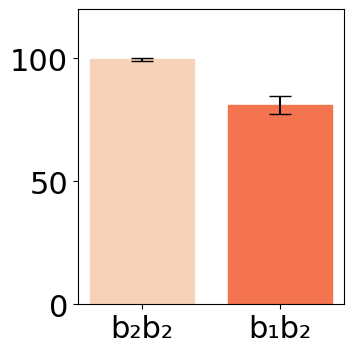

In [170]:
import matplotlib.pyplot as plt

bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['b2b2','b1b2']
lab = [lab[n].translate(SUB) for n in range(2)]

data = {lab[0]:collect_acc_1.mean()*100/4, lab[1]:float(collect_acc_2.mean()*100/4)}
xx = list(data.keys())
yy = list(data.values())

error = [float(stats.sem(collect_acc_1)[0]*100/4),float(stats.sem(collect_acc_2)[0]*100/4)]

font_size = 22

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))

alp = 1

barlist = plt.bar(xx,yy,yerr=error,align='center',ecolor='black',capsize=8,width=bar_width)
barlist[0].set_color('#f7d2b9')
barlist[1].set_color('#f3744f')

ax.set_ylim([0,120])

plt.tight_layout()
plt.savefig('retrieving.png',transparent = True)

plt.show()

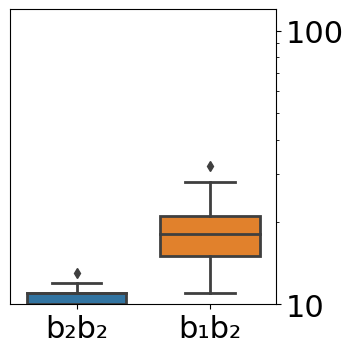

In [169]:
import pandas as pd
import seaborn as sn

font_size = 22
bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['b2b2','b1b2']
lab = [lab[n].translate(SUB) for n in range(2)]

main_df = {lab[0]: response_time_1, lab[1]: response_time_2}
main_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in main_df.items() ]))

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))


ax = sn.boxplot(data=main_df, width=0.75, linewidth=2)


ax.set_ylim(10,120)

ax.set_xlabel('')
ax.set_ylabel('')
plt.legend([],[], frameon=False)


ax.yaxis.tick_right()
ax.set_yscale('log')
ax.set_yticks([10,100])
ax.set_yticklabels([10,100])

plt.tight_layout()
plt.savefig('retrieving.png', transparent = True)


### Simulation 11: b1b2 vs a1b2

In [197]:
# from scipy import stats
# # b1b2
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,4],[7,5],[8,0],[9,1],[10,2],[11,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,4,5]] # long-term encoding between role neurons.

# # sentence a1 = word4 -> word5 -> word6 -> word7
# # sentence b1 = word0 -> word1 -> word2 -> word3
# # sentence b2 = word8 -> word9 -> word10 -> word11
# unified_noise = 0.15 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=0))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=1))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=2))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=3))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=10))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=11))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_1 = np.zeros((50,1))
# response_time_1 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [8,9,10,11]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc > 2:
#         response_time_1.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_1[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_1.mean()*100/4) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_1)[0]*100/4) + '%.')

In [196]:
# from scipy import stats
# #a1b2

# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,4],[7,5],[8,0],[9,1],[10,2],[11,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,4,5]] # long-term encoding between role neurons.

# # sentence a1 = word4 -> word5 -> word6 -> word7
# # sentence b1 = word0 -> word1 -> word2 -> word3
# # sentence b2 = word8 -> word9 -> word10 -> word11
# unified_noise = 0.15 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=4))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=5))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=6))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=7))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=10))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=11))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_2 = np.zeros((50,1))
# response_time_2 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [8,9,10,11]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc > 2:
#         response_time_2.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_2[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_2.mean()*100/4) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_2)[0]*100/4) + '%.')

In [192]:
print(stats.ttest_ind(collect_acc_1,collect_acc_2))
print(stats.mannwhitneyu(response_time_1,response_time_2))

Ttest_indResult(statistic=array([2.19274067]), pvalue=array([0.03069227]))
MannwhitneyuResult(statistic=573.0, pvalue=0.0015721957527119492)


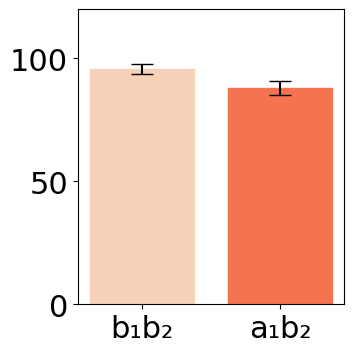

In [195]:
import matplotlib.pyplot as plt

bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['b1b2','a1b2']
lab = [lab[n].translate(SUB) for n in range(2)]

data = {lab[0]:collect_acc_1.mean()*100/4, lab[1]:float(collect_acc_2.mean()*100/4)}
xx = list(data.keys())
yy = list(data.values())

error = [float(stats.sem(collect_acc_1)[0]*100/4),float(stats.sem(collect_acc_2)[0]*100/4)]

font_size = 22

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))

alp = 1

barlist = plt.bar(xx,yy,yerr=error,align='center',ecolor='black',capsize=8,width=bar_width)
barlist[0].set_color('#f7d2b9')
barlist[1].set_color('#f3744f')

ax.set_ylim([0,120])

plt.tight_layout()
plt.savefig('retrieving.png',transparent = True)

plt.show()

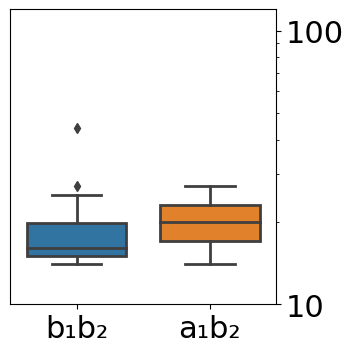

In [194]:
import pandas as pd
import seaborn as sn

font_size = 22
bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['b1b2','a1b2']
lab = [lab[n].translate(SUB) for n in range(2)]

main_df = {lab[0]: response_time_1, lab[1]: response_time_2}
main_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in main_df.items() ]))

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))


ax = sn.boxplot(data=main_df, width=0.75, linewidth=2)


ax.set_ylim(10,120)

ax.set_xlabel('')
ax.set_ylabel('')
plt.legend([],[], frameon=False)


ax.yaxis.tick_right()
ax.set_yscale('log')
ax.set_yticks([10,100])
ax.set_yticklabels([10,100])

plt.tight_layout()
plt.savefig('retrieving.png', transparent = True)


### Simulation S4: a2a2 vs a1a2

In [205]:
# from scipy import stats
# # a2a2
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,3],[7,0],[8,1],[9,2],[10,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# # sentence a1 = word0 -> word1 -> word2 -> word3
# # sentence a2 = word7 -> word8 -> word9 -> word10
# # sentence c1 = word4 -> word5 -> word6

# unified_noise = 0.25 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=10))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=10))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_1 = np.zeros((50,1))
# response_time_1 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [7,8,9,10]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc > 2:
#         response_time_1.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_1[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_1.mean()*100/4) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_1)[0]*100/4) + '%.')

In [204]:
# from scipy import stats
# # a1a2
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,3],[7,0],[8,1],[9,2],[10,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# # sentence a1 = word0 -> word1 -> word2 -> word3
# # sentence a2 = word7 -> word8 -> word9 -> word10
# # sentence c1 = word4 -> word5 -> word6

# unified_noise = 0.25 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=0))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=1))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=2))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=3))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=10))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_2 = np.zeros((50,1))
# response_time_2 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [7,8,9,10]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc > 2:
#         response_time_2.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_2[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_1.mean()*100/4) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_1)[0]*100/4) + '%.')

In [200]:
print(stats.ttest_ind(collect_acc_1,collect_acc_2))
print(stats.mannwhitneyu(response_time_1,response_time_2))

Ttest_indResult(statistic=array([3.90510225]), pvalue=array([0.00017313]))
MannwhitneyuResult(statistic=0.0, pvalue=2.3018587481572047e-16)


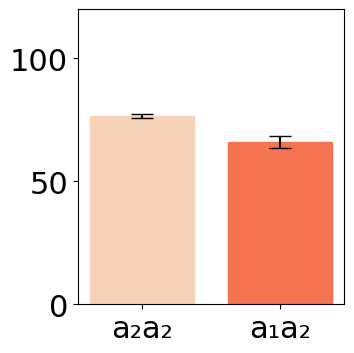

In [203]:
import matplotlib.pyplot as plt

bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['a2a2','a1a2']
lab = [lab[n].translate(SUB) for n in range(2)]

data = {lab[0]:collect_acc_1.mean()*100/4, lab[1]:float(collect_acc_2.mean()*100/4)}
xx = list(data.keys())
yy = list(data.values())

error = [float(stats.sem(collect_acc_1)[0]*100/4),float(stats.sem(collect_acc_2)[0]*100/4)]

font_size = 22

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))

alp = 1

barlist = plt.bar(xx,yy,yerr=error,align='center',ecolor='black',capsize=8,width=bar_width)
barlist[0].set_color('#f7d2b9')
barlist[1].set_color('#f3744f')

ax.set_ylim([0,120])

plt.tight_layout()
plt.savefig('retrieving.png',transparent = True)

plt.show()

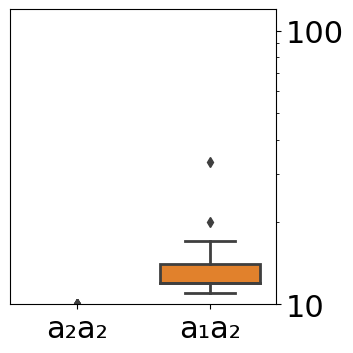

In [202]:
import pandas as pd
import seaborn as sn

font_size = 22
bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['a2a2','a1a2']
lab = [lab[n].translate(SUB) for n in range(2)]

main_df = {lab[0]: response_time_1, lab[1]: response_time_2}
main_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in main_df.items() ]))

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))


ax = sn.boxplot(data=main_df, width=0.75, linewidth=2)


ax.set_ylim(10,120)

ax.set_xlabel('')
ax.set_ylabel('')
plt.legend([],[], frameon=False)


ax.yaxis.tick_right()
ax.set_yscale('log')
ax.set_yticks([10,100])
ax.set_yticklabels([10,100])

plt.tight_layout()
plt.savefig('retrieving.png', transparent = True)


### Simulation S5: a1a2 vs c1a2

In [163]:
# from scipy import stats
# # a1a2
# lambda_cc = 1.25
# total_trials = 50

# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,3],[7,0],[8,1],[9,2],[10,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# # sentence a1 = word0 -> word1 -> word2 -> word3
# # sentence a2 = word7 -> word8 -> word9 -> word10
# # sentence c1 = word4 -> word5 -> word6

# unified_noise = 0.1 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=0))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=1))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=2))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=3))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=10))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_1 = np.zeros((total_trials,1))
# response_time_1 = []
# r = 0

# for seed_ in range(total_trials):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [7,8,9,10]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc > 2:
#         response_time_1.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_1[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_1.mean()*100/4) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_1)[0]*100/4) + '%.')
# print(response_time_1)

In [162]:
# from scipy import stats
# # c1a2
# total_trials = 50
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,3],[7,0],[8,1],[9,2],[10,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# # sentence a1 = word0 -> word1 -> word2 -> word3
# # sentence a2 = word7 -> word8 -> word9 -> word10
# # sentence c1 = word4 -> word5 -> word6

# unified_noise = 0.1 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=4))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=5))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=6))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=10))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_2 = np.zeros((total_trials,1))
# response_time_2 = []
# r = 0

# for seed_ in range(total_trials):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [7,8,9,10]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc > 2:
#         response_time_2.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_2[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_2.mean()*100/4) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_2)[0]*100/4) + '%.')
# print(response_time_2)

In [157]:
print(stats.ttest_ind(collect_acc_1,collect_acc_2))
print(stats.mannwhitneyu(response_time_1,response_time_2))

Ttest_indResult(statistic=array([2.73904953]), pvalue=array([0.00732081]))
MannwhitneyuResult(statistic=572.0, pvalue=0.0003143536870086814)


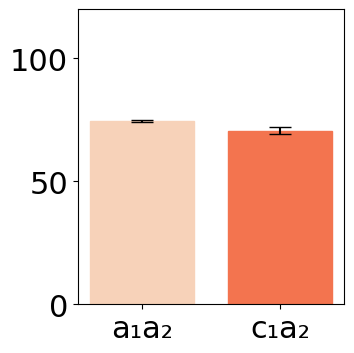

In [160]:
import matplotlib.pyplot as plt

bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['a1a2','c1a2']
lab = [lab[n].translate(SUB) for n in range(2)]

data = {lab[0]:collect_acc_1.mean()*100/4, lab[1]:float(collect_acc_2.mean()*100/4)}
xx = list(data.keys())
yy = list(data.values())

error = [float(stats.sem(collect_acc_1)[0]*100/4),float(stats.sem(collect_acc_2)[0]*100/4)]

font_size = 22

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))

alp = 1

barlist = plt.bar(xx,yy,yerr=error,align='center',ecolor='black',capsize=8,width=bar_width)
barlist[0].set_color('#f7d2b9')
barlist[1].set_color('#f3744f')

ax.set_ylim([0,120])

plt.tight_layout()
plt.savefig('retrieving.png',transparent = True)

plt.show()

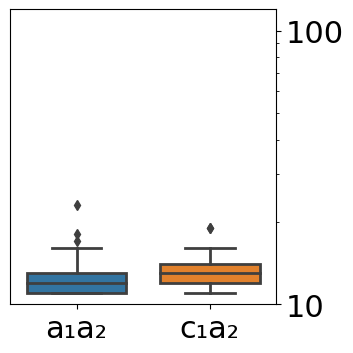

In [161]:
import pandas as pd
import seaborn as sn

font_size = 22
bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['a1a2','c1a2']
lab = [lab[n].translate(SUB) for n in range(2)]

main_df = {lab[0]: response_time_1, lab[1]: response_time_2}
main_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in main_df.items() ]))

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))


ax = sn.boxplot(data=main_df, width=0.75, linewidth=2)


ax.set_ylim(10,120)

ax.set_xlabel('')
ax.set_ylabel('')
plt.legend([],[], frameon=False)


ax.yaxis.tick_right()
ax.set_yscale('log')
ax.set_yticks([10,100])
ax.set_yticklabels([10,100])

plt.tight_layout()
plt.savefig('retrieving.png', transparent = True)


### Simulation S6: c2c2 vs c1c2

In [213]:
# from scipy import stats
# # c2c2
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,3],[3,0],[4,1],[5,2],[6,3],[7,0],[8,1],[9,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# # sentence a1 = word3 -> word4 -> word5 -> word6
# # sentence c1 = word0 -> word1 -> word2
# # sentence c2 = word7 -> word8 -> word9
# unified_noise = 0.25 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=9))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_1 = np.zeros((50,1))
# response_time_1 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [7,8,9]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc == 3:
#         response_time_1.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_1[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_1.mean()*100/3) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_1)[0]*100/3) + '%.')

In [212]:
# from scipy import stats
# # c1c2
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,3],[3,0],[4,1],[5,2],[6,3],[7,0],[8,1],[9,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# # sentence a1 = word3 -> word4 -> word5 -> word6
# # sentence c1 = word0 -> word1 -> word2
# # sentence c2 = word7 -> word8 -> word9
# unified_noise = 0.25 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=0))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=1))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=2))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_2 = np.zeros((50,1))
# response_time_2 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [7,8,9]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc == 3:
#         response_time_2.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_2[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_2.mean()*100/3) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_2)[0]*100/3) + '%.')

In [208]:
print(stats.ttest_ind(collect_acc_1,collect_acc_2))
print(stats.mannwhitneyu(response_time_1,response_time_2))

Ttest_indResult(statistic=array([4.03030303]), pvalue=array([0.00011016]))
MannwhitneyuResult(statistic=34.5, pvalue=4.639050167383799e-15)


/var/folders/rx/0djf6wx57cb73jplfsqb1k9c0000gp/T/ipykernel_20022/3923506545.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(stats.ttest_ind(collect_acc_1,collect_acc_2))


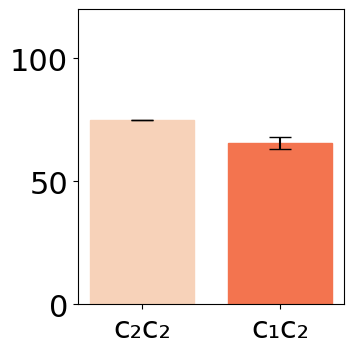

In [211]:
import matplotlib.pyplot as plt

bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['c2c2','c1c2']
lab = [lab[n].translate(SUB) for n in range(2)]

data = {lab[0]:collect_acc_1.mean()*100/4, lab[1]:float(collect_acc_2.mean()*100/4)}
xx = list(data.keys())
yy = list(data.values())

error = [float(stats.sem(collect_acc_1)[0]*100/4),float(stats.sem(collect_acc_2)[0]*100/4)]

font_size = 22

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))

alp = 1

barlist = plt.bar(xx,yy,yerr=error,align='center',ecolor='black',capsize=8,width=bar_width)
barlist[0].set_color('#f7d2b9')
barlist[1].set_color('#f3744f')

ax.set_ylim([0,120])

plt.tight_layout()
plt.savefig('retrieving.png',transparent = True)

plt.show()

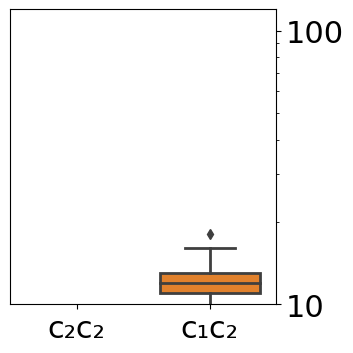

In [210]:
import pandas as pd
import seaborn as sn

font_size = 22
bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['c2c2','c1c2']
lab = [lab[n].translate(SUB) for n in range(2)]

main_df = {lab[0]: response_time_1, lab[1]: response_time_2}
main_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in main_df.items() ]))

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))


ax = sn.boxplot(data=main_df, width=0.75, linewidth=2)


ax.set_ylim(10,120)

ax.set_xlabel('')
ax.set_ylabel('')
plt.legend([],[], frameon=False)


ax.yaxis.tick_right()
ax.set_yscale('log')
ax.set_yticks([10,100])
ax.set_yticklabels([10,100])

plt.tight_layout()
plt.savefig('retrieving.png', transparent = True)


### Simulation S7: c1c2 vs a1c2

In [231]:
# from scipy import stats
# # c1c2
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,3],[3,0],[4,1],[5,2],[6,3],[7,0],[8,1],[9,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# # sentence a1 = word3 -> word4 -> word5 -> word6
# # sentence c1 = word0 -> word1 -> word2
# # sentence c2 = word7 -> word8 -> word9
# unified_noise = 0.15 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=0))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=1))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=2))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_1 = np.zeros((50,1))
# response_time_1 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [7,8,9]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc == 3:
#         response_time_1.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_1[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_1.mean()*100/3) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_1)[0]*100/3) + '%.')

In [230]:
# from scipy import stats
# # a1c2
# no_periods = 1
# # long term encodings
# LT_wc_knowledge = [[0,0],[1,1],[2,3],[3,0],[4,1],[5,2],[6,3],[7,0],[8,1],[9,3]] # long-term encoding between word and role neurons
# LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# # sentence a1 = word3 -> word4 -> word5 -> word6
# # sentence c1 = word0 -> word1 -> word2
# # sentence c2 = word7 -> word8 -> word9
# unified_noise = 0.15 # noise level if noise is present
# cc_noise = True # any noise amongst role neurons
# wc_noise = True # any noise between role and word neurons

# # building the sentence
# sentence_prime = []
# for n in range(head): sentence_prime.append(cjn.in_in())
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=3))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=4))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=5))
# for n in range(num_steps): sentence_prime.append(cjn.in_in(word=6))
# for n in range(tail): sentence_prime.append(cjn.in_in())

# # to simulate a shuffled word list, change the word order appended to the sentence as required
# sentence_target = []
# for n in range(head): sentence_target.append(cjn.in_in())
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=7))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=8))
# for n in range(num_steps): sentence_target.append(cjn.in_in(word=9))
# for n in range(tail): sentence_target.append(cjn.in_in())

# def flatten(l):
#     return [item for sublist in l for item in sublist]

# collect_acc_2 = np.zeros((50,1))
# response_time_2 = []
# r = 0

# for seed_ in range(50):
    
#     np.random.seed(seed_)
#     random.seed(seed_)
    
#     ## initialising the working memory model
#     WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
#                            cc_connectivity_factor = gamma,
#                            activation_decay = beta,
#                            LR_c = lambda_cc,
#                            LR_w = lambda_cf,
#                            cc_max_connection = epsilon_cc,
#                            cf_max_connection = epsilon_cf,
#                            n_word_neurons = n_word_neurons,
#                            time_factor = tau,
#                            LT_wc_knowledge = LT_wc_knowledge,
#                            cc_learnt_weight = k_L_cc - k_cc,
#                            cf_learnt_weight = k_L_cf - k_cf,
#                            input_node_connectivity = W_ff,
#                            LT_cc_knowledge = LT_cc_knowledge,
#                            cc_floor_weight = -k_cc, 
#                            cf_floor_weight = -k_cf,
#                            unified_noise = unified_noise,
#                            cc_noise = cc_noise,
#                            wc_noise = wc_noise,
#                            cf_conj_factor = h
#                           )


#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_prime)*no_periods, sentence=sentence_prime)

#     # running the encoding phase
#     role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence_target)*no_periods, sentence=sentence_target)
    
#     WM_r = deepcopy(WM_ori) # copy the encoded model
#     initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
#     n_steps = 50 # total number of time steps taken during recall

    
#     # building recall input with 5 initial time steps with input into the first role neuron and then no further input.
#     recall_input = []
#     for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
#     for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

#     # running the recall phase
#     cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)
    
#     # Final recall determined by argmax at each time step
#     print('The final recall output is: ')
#     print(cjn.argmax_sentence(f_act_hx_r))
    
#     acc = 0
#     for x in [7,8,9]:
#         if x in flatten(cjn.argmax_sentence(f_act_hx_r)):
#             acc += 1
#     if acc == 3:
#         response_time_2.append(cjn.get_response_time(f_act_hx_r))
            
#     collect_acc_2[r] = acc
#     r += 1
    
# print('Recall accuracy is ' + str(collect_acc_2.mean()*100/3) + '%.')
# print('SEM is ' + str(stats.sem(collect_acc_2)[0]*100/3) + '%.')

In [226]:
print(stats.ttest_ind(collect_acc_1,collect_acc_2))
print(stats.mannwhitneyu(response_time_1,response_time_2))

Ttest_indResult(statistic=array([1.4]), pvalue=array([0.16467118]))
MannwhitneyuResult(statistic=692.5, pvalue=0.06396235959672626)


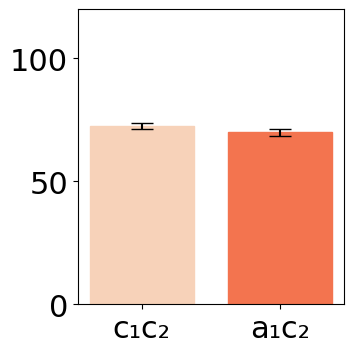

In [229]:
import matplotlib.pyplot as plt

bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['c1c2','a1c2']
lab = [lab[n].translate(SUB) for n in range(2)]

data = {lab[0]:collect_acc_1.mean()*100/4, lab[1]:float(collect_acc_2.mean()*100/4)}
xx = list(data.keys())
yy = list(data.values())

error = [float(stats.sem(collect_acc_1)[0]*100/4),float(stats.sem(collect_acc_2)[0]*100/4)]

font_size = 22

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))

alp = 1

barlist = plt.bar(xx,yy,yerr=error,align='center',ecolor='black',capsize=8,width=bar_width)
barlist[0].set_color('#f7d2b9')
barlist[1].set_color('#f3744f')

ax.set_ylim([0,120])

plt.tight_layout()
plt.savefig('retrieving.png',transparent = True)

plt.show()

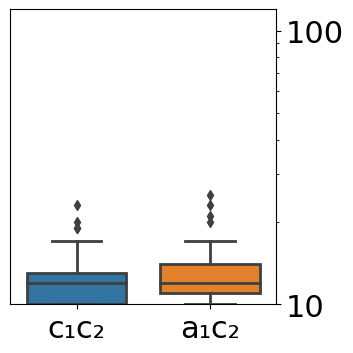

In [228]:
import pandas as pd
import seaborn as sn

font_size = 22
bar_width = 0.75
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
lab = ['c1c2','a1c2']
lab = [lab[n].translate(SUB) for n in range(2)]

main_df = {lab[0]: response_time_1, lab[1]: response_time_2}
main_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in main_df.items() ]))

plt.rc('font', size=font_size) 

fig, ax = plt.subplots(figsize=(4, 4))


ax = sn.boxplot(data=main_df, width=0.75, linewidth=2)


ax.set_ylim(10,120)

ax.set_xlabel('')
ax.set_ylabel('')
plt.legend([],[], frameon=False)


ax.yaxis.tick_right()
ax.set_yscale('log')
ax.set_yticks([10,100])
ax.set_yticklabels([10,100])

plt.tight_layout()
plt.savefig('retrieving.png', transparent = True)
